In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Chargement
df = pd.read_csv("Customer_Churn.csv")

In [6]:
#  Identification des colonnes catégorielles
print("=== COLONNES NUMERIQUES ===")
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f" Variables numériques ({len(numeric_columns)}) : {numeric_columns}")
print("=== COLONNES CATÉGORIELLES ===")
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Retirer la variable cible et l'ID client des listes
if 'Churn' in categorical_columns:
    categorical_columns.remove('Churn')
if 'customerID' in categorical_columns:
    categorical_columns.remove('customerID')
    
print(F"Variables catégorielles :({len(categorical_columns)})")
for col in categorical_columns:
    unique_vals = df[col].unique()
    print(f"  - {col} : {len(unique_vals)} valeurs uniques -> {unique_vals[:5]}")

=== COLONNES NUMERIQUES ===
 Variables numériques (3) : ['SeniorCitizen', 'tenure', 'MonthlyCharges']
=== COLONNES CATÉGORIELLES ===
Variables catégorielles :(16)
  - gender : 2 valeurs uniques -> ['Female' 'Male']
  - Partner : 2 valeurs uniques -> ['Yes' 'No']
  - Dependents : 2 valeurs uniques -> ['No' 'Yes']
  - PhoneService : 2 valeurs uniques -> ['No' 'Yes']
  - MultipleLines : 3 valeurs uniques -> ['No phone service' 'No' 'Yes']
  - InternetService : 3 valeurs uniques -> ['DSL' 'Fiber optic' 'No']
  - OnlineSecurity : 3 valeurs uniques -> ['No' 'Yes' 'No internet service']
  - OnlineBackup : 3 valeurs uniques -> ['Yes' 'No' 'No internet service']
  - DeviceProtection : 3 valeurs uniques -> ['No' 'Yes' 'No internet service']
  - TechSupport : 3 valeurs uniques -> ['No' 'Yes' 'No internet service']
  - StreamingTV : 3 valeurs uniques -> ['No' 'Yes' 'No internet service']
  - StreamingMovies : 3 valeurs uniques -> ['No' 'Yes' 'No internet service']
  - Contract : 3 valeurs uniques 

In [7]:
#Suppression de la colonne customerID

df.drop(columns=["customerID"], axis=1, inplace=True)

In [8]:
# Vérifier les doublons et les supprimer si nécessaire
df.drop_duplicates(inplace=True)

In [9]:
# Conversion de TotalCharges en numérique (peut contenir des espaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [10]:
# Encodage temporaire de la variable cible
df.Churn = df.Churn.replace({'Yes': 1, 'No': 0})

In [11]:
# Identifier les features avec la plus grande variance
numeric_cols = ["SeniorCitizen","MonthlyCharges","tenure","TotalCharges"]
variances = df[numeric_cols].var().sort_values(ascending=False)

top_variance_features = variances.head()

top_variance_features

TotalCharges      5.138477e+06
MonthlyCharges    9.041448e+02
tenure            6.019645e+02
SeniorCitizen     1.361215e-01
dtype: float64

In [22]:
# Calculer le skewness (asymétrie) de chaque feature numérique
skewness = df[numeric_cols].apply(skew).sort_values(ascending=False)

skewness

SeniorCitizen     1.829596
tenure            0.235491
MonthlyCharges   -0.224049
TotalCharges           NaN
dtype: float64

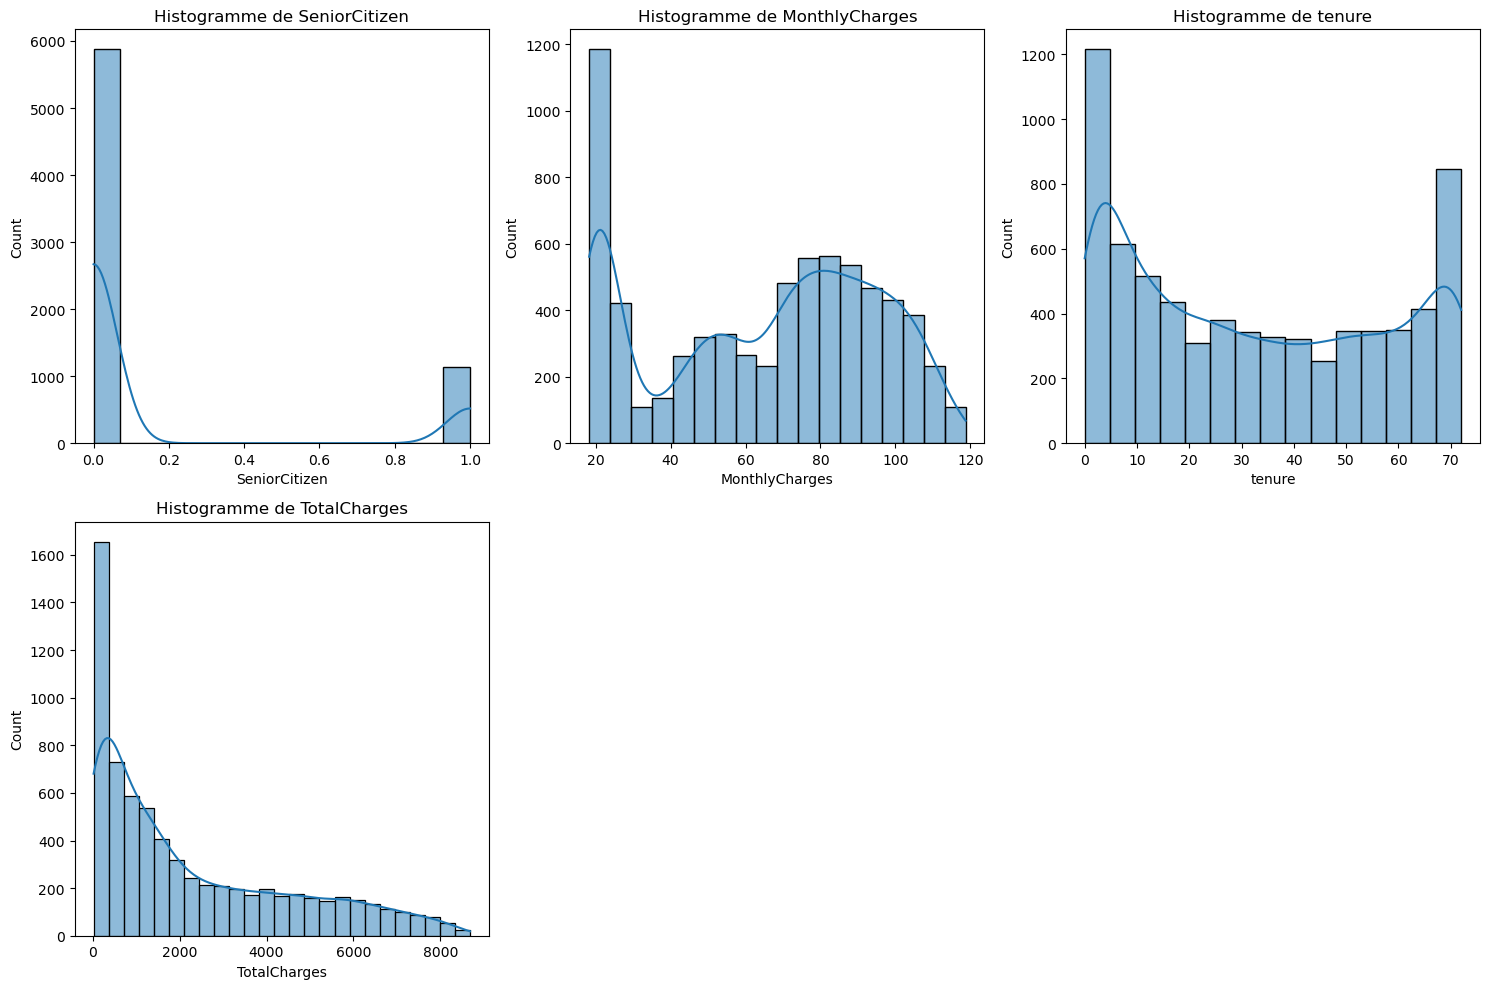

In [12]:
#Histogrammes des features  avec KDE
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols):
    plt.subplot(2, 3,i+1)
    sns.histplot(df[feature], kde = True)
    plt.title(f'Histogramme de {feature}')
    
plt.tight_layout()
plt.show()

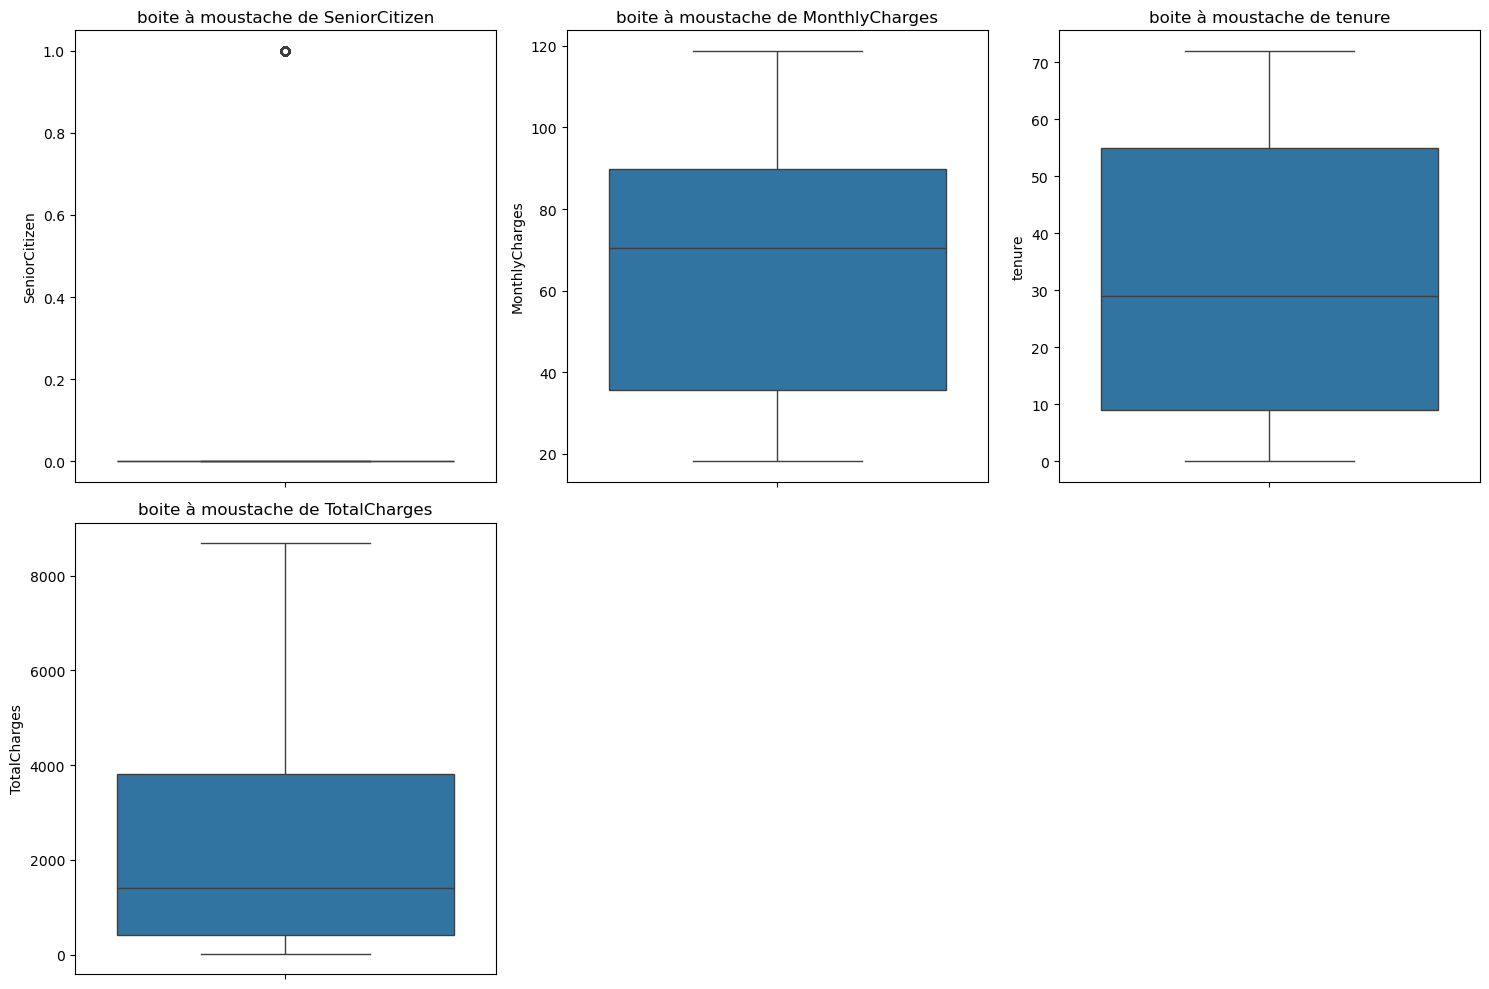

In [24]:
# Boxplots pour détecter les outliers

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_cols):
    plt.subplot(2, 3,i+1)
    sns.boxplot(df[feature])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()


 Analyse de l'impact des variables catégorielles sur le Churn :


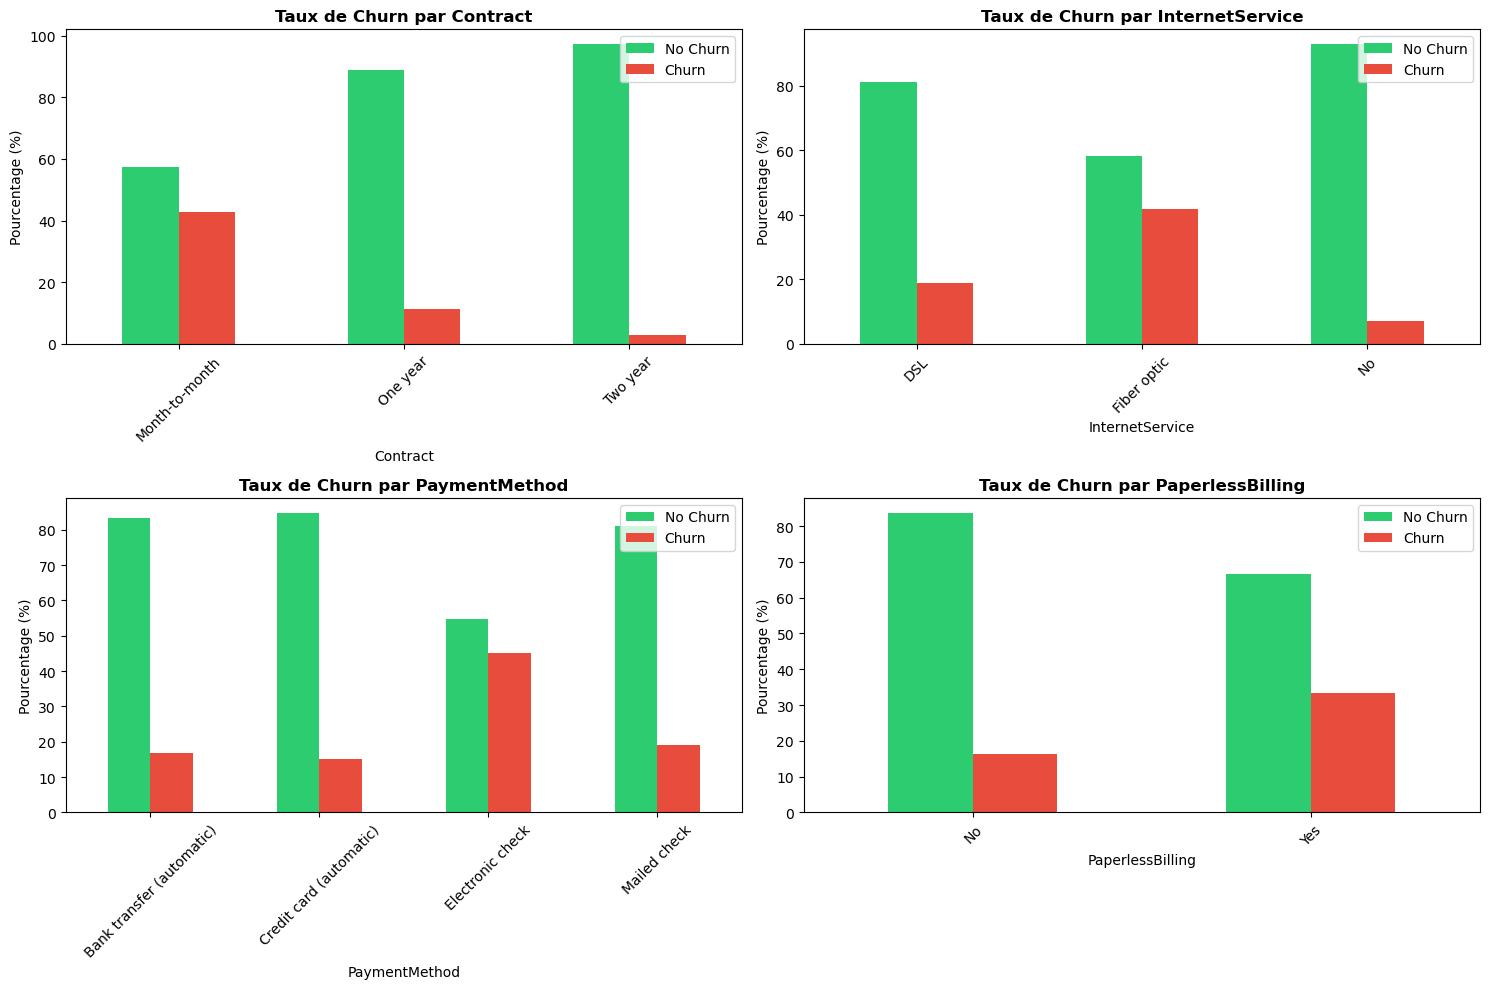

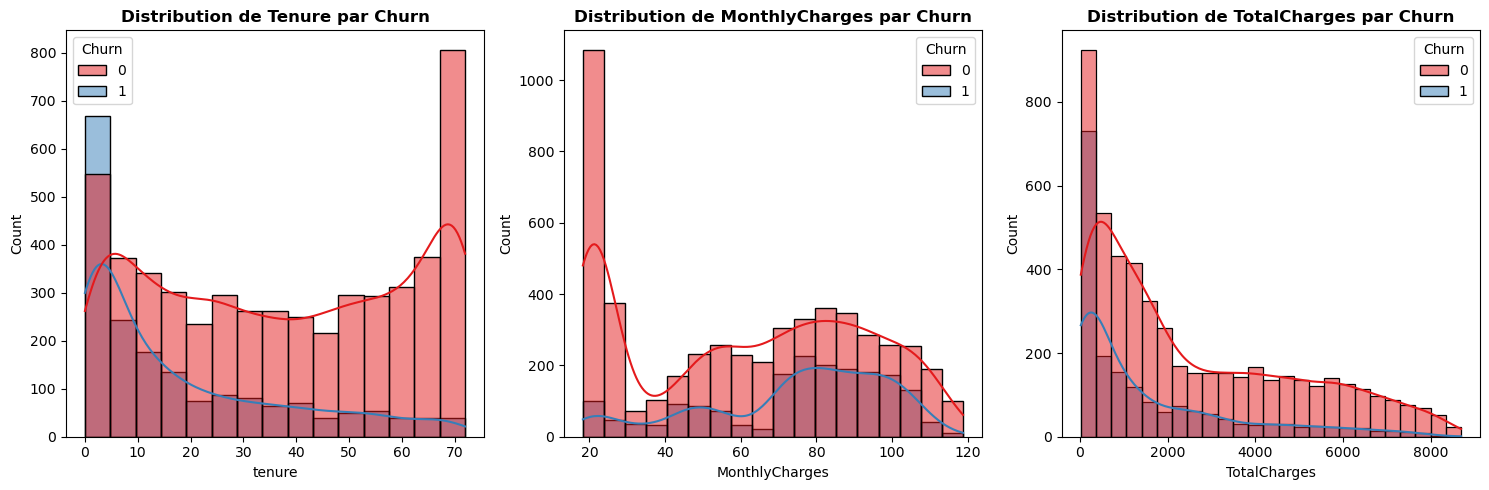

In [13]:
# Analyse de la relation entre les variables catégorielles et le Churn
print("\n Analyse de l'impact des variables catégorielles sur le Churn :")

# Sélection de quelques variables clés pour l'analyse
key_categorical = ['Contract', 'InternetService', 'PaymentMethod', 'PaperlessBilling']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    # Création d'un tableau croisé
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    ct.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
    axes[idx].set_title(f'Taux de Churn par {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Pourcentage (%)', fontsize=10)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].legend(['No Churn', 'Churn'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()


# Distribution des variables numériques par Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Tenure (durée de relation client)
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[0], palette='Set1')
axes[0].set_title('Distribution de Tenure par Churn', fontweight='bold')

# MonthlyCharges (charges mensuelles)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes[1], palette='Set1')
axes[1].set_title('Distribution de MonthlyCharges par Churn', fontweight='bold')

# TotalCharges (charges totales)
sns.histplot(data=df[df['TotalCharges'].notna()], x='TotalCharges', hue='Churn', kde=True, ax=axes[2], palette='Set1')
axes[2].set_title('Distribution de TotalCharges par Churn', fontweight='bold')

plt.tight_layout()


Text(0.5, 1.0, 'Matrice de Corrélation des Variables Numériques')

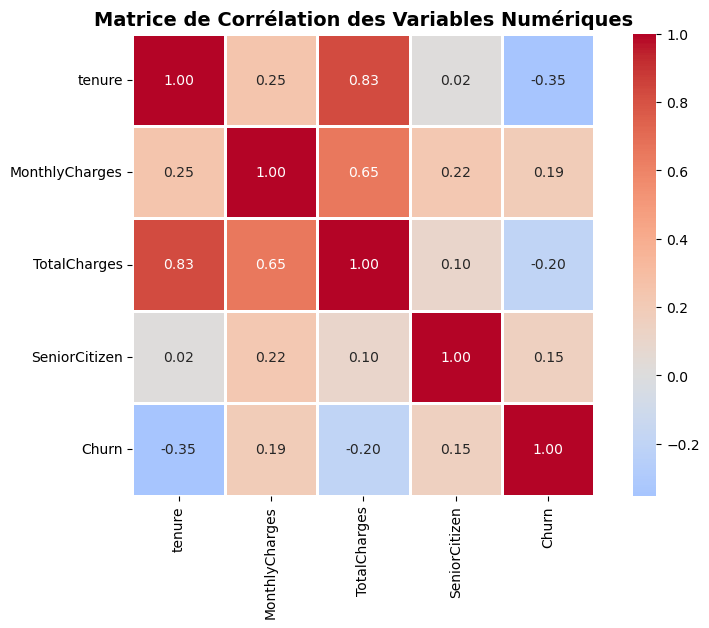

In [27]:
# Analyse de corrélation pour les variables numériques
numeric_cols_with_target = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Churn']
correlation_matrix = df[numeric_cols_with_target].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')

In [28]:
# Top  des features les plus corrélées avec le Churn
corr_target = correlation_matrix['Churn'].drop('Churn').abs().sort_values(ascending=False)

top_corr_features = corr_target.head()
top_corr_features

tenure            0.351508
TotalCharges      0.198362
MonthlyCharges    0.194508
SeniorCitizen     0.151619
Name: Churn, dtype: float64

In [29]:
# c) Pairplot des 3 paires de features les plus corrélées
feature_cor = correlation_matrix.drop('Churn', axis=1).drop('Churn', axis=0)

cor_pairs = (
    feature_cor.abs()
    .unstack()
    .sort_values(ascending=False)
)

#suppression des doublons
cor_pairs = cor_pairs[cor_pairs < 1]
top_pairs = cor_pairs.head(3)

top_pairs

tenure          TotalCharges    0.825293
TotalCharges    tenure          0.825293
MonthlyCharges  TotalCharges    0.650540
dtype: float64

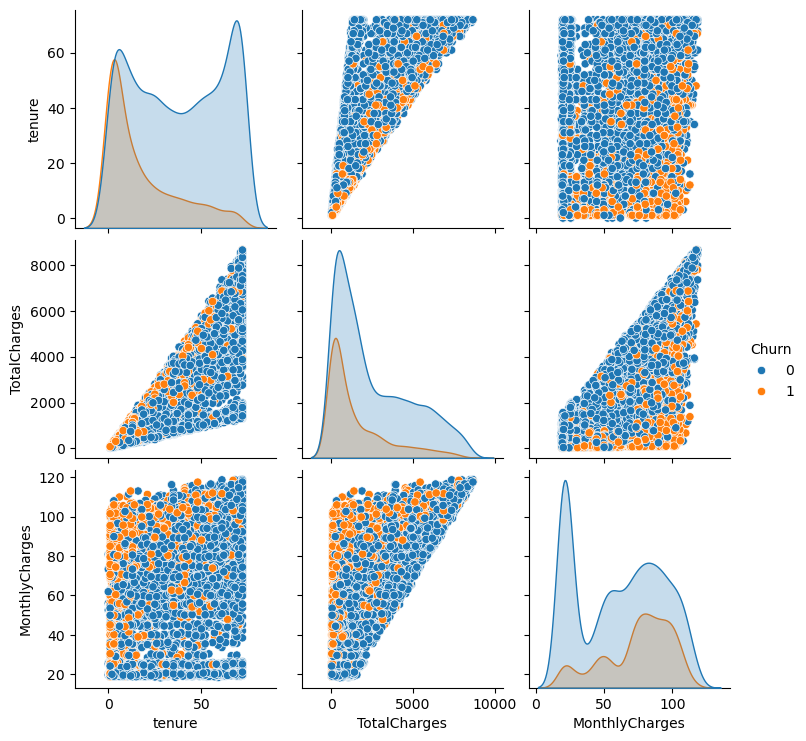

In [30]:
top_pairs_feat = ['tenure', 'TotalCharges', 'MonthlyCharges','Churn']
sns.pairplot(df[top_pairs_feat], hue='Churn')

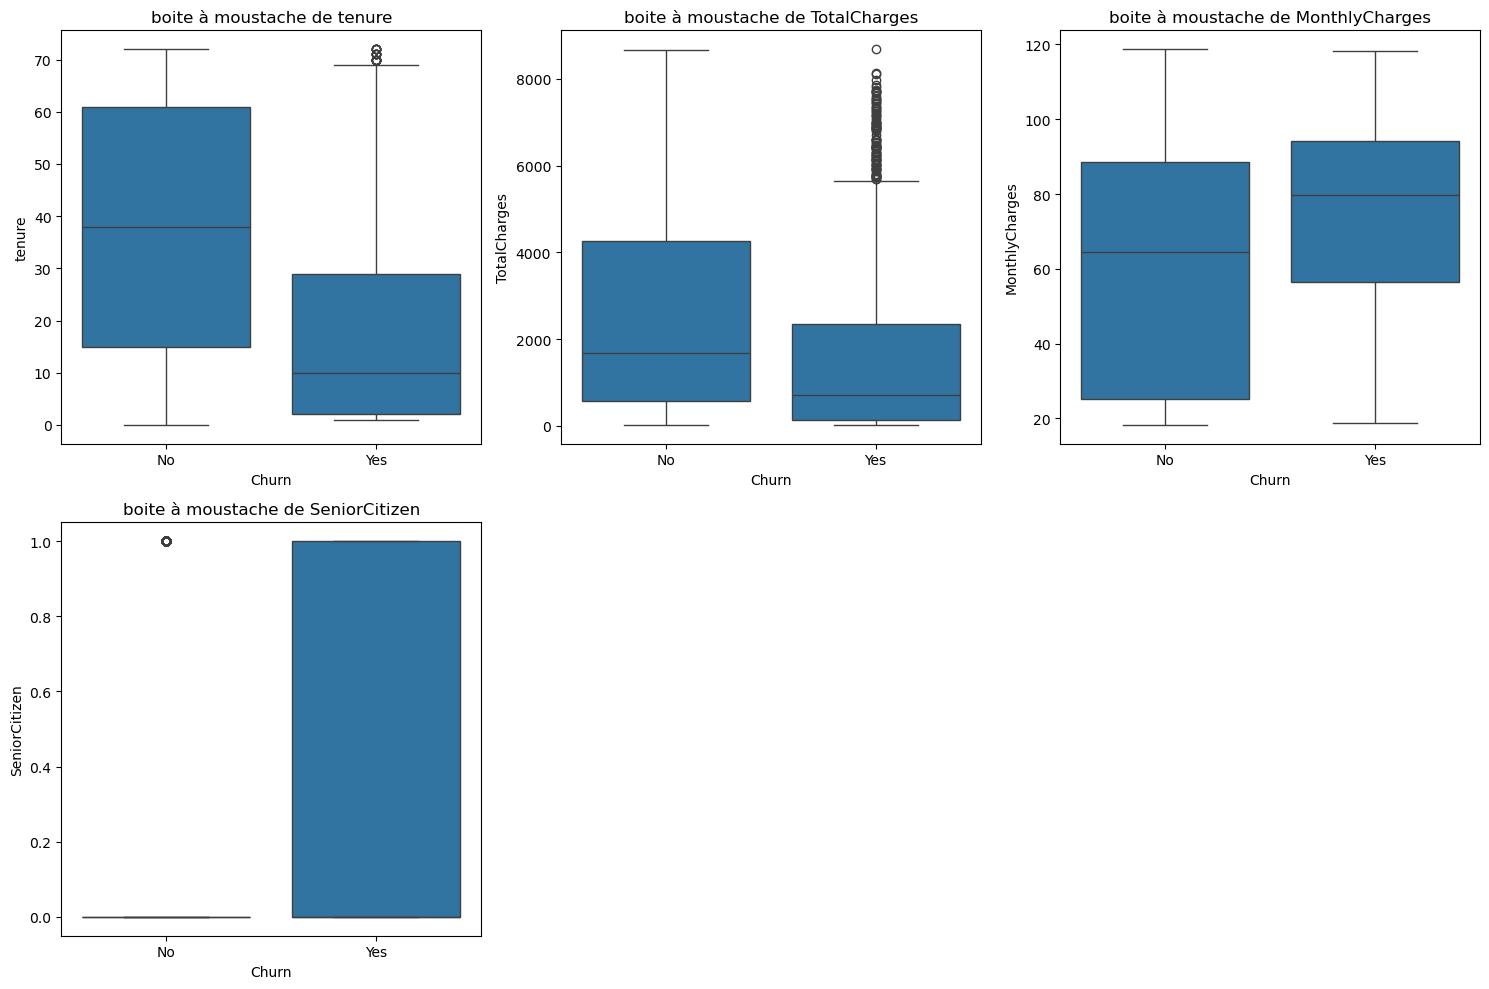

In [31]:

#  Analyse par classe (yes vs No)
# a) Boxplots comparatifs pour les  features les plus discriminantes
top_5_features = top_corr_features.index[:5]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_5_features):
    plt.subplot(2, 3,i+1)
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.xticks([0,1], ['No', 'Yes'])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()

In [33]:
#  T-tests pour vérifier les différences significatives entre classes
ttest_results = []

for feature in top_5_features:
    No_values = df[df['Churn'] == 0][feature]
    Yes_values = df[df['Churn'] == 1][feature]
    t_stat, p_value = ttest_ind(No_values, Yes_values)
    ttest_results.append({
        'feature': feature,
        't_statistic': t_stat,
        'p_value': p_value
    })
    
    ttest_df = pd.DataFrame(ttest_results)
ttest_df

,feature,t_statistic,p_value
0,tenure,31.456559,2.628095e-203
1,TotalCharges,NaN,NaN
2,MonthlyCharges,-16.613049,8.041922e-61
3,SeniorCitizen,-12.851092,2.232819e-37


In [34]:
# c) Moyennes et écarts-types par classe
class_stats = df.groupby('Churn')[top_5_features].agg(['mean', 'std'])
class_stats

tenure            TotalCharges              MonthlyCharges  \
            mean        std         mean          std           mean   
Churn                                                                  
0      37.640782  24.083296  2560.264118  2329.034632      61.344878   
1      18.088853  19.546231  1541.376548  1893.151020      74.604308   

                 SeniorCitizen            
             std          mean       std  
Churn                                     
0      31.069815      0.128970  0.335199  
1      24.597504      0.255789  0.436421